In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('titanic.csv')

In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Survial Percentage

In [5]:
survival_percentage = data['Survived'].mean() * 100
print(f"Percentage of passengers who survived: {survival_percentage:.2f}%")


Percentage of passengers who survived: 38.38%


Survived
0    549
1    342
Name: count, dtype: int64


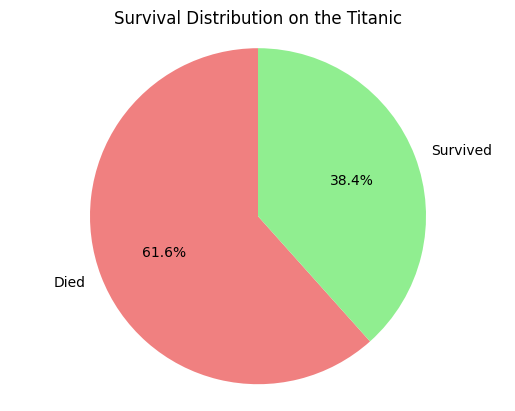

In [6]:

# Count the number of survivors and non-survivors
survival_counts = data['Survived'].value_counts()
print(survival_counts)
# Plot a pie chart
labels = ['Died', 'Survived']
colors = ['lightcoral', 'lightgreen']

plt.pie(survival_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Survival Distribution on the Titanic')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


## Survival by class

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


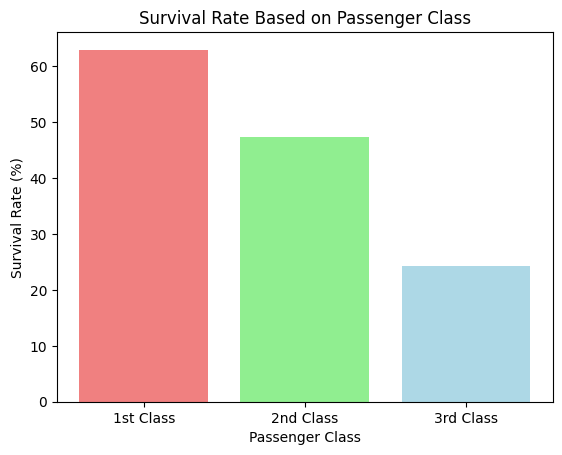

In [7]:
survival_by_class = data.groupby('Pclass')['Survived'].mean()
print(survival_by_class*100)
# Plot the results
plt.bar(survival_by_class.index, survival_by_class * 100, color=['lightcoral', 'lightgreen', 'lightblue'])
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate Based on Passenger Class')
plt.xticks(survival_by_class.index, labels=['1st Class', '2nd Class', '3rd Class'], rotation=0)
plt.show()

## Survival by Sex

In [8]:
survivors_by_sex = data.groupby('Sex')['Survived'].sum()
survivors_by_sex

Sex
female    233
male      109
Name: Survived, dtype: int64

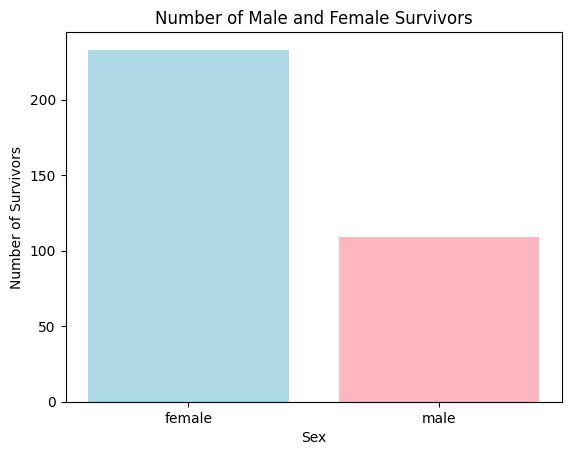

In [9]:
# Plot the results
plt.bar(survivors_by_sex.index, survivors_by_sex, color=['lightblue', 'lightpink'])
plt.xlabel('Sex')
plt.ylabel('Number of Survivors')
plt.title('Number of Male and Female Survivors')
plt.show()

## Distribution of Passenger Ages

## Training the model to predict survival

In [10]:
# Set-up
import csv
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense
from numpy.random import seed
import tensorflow

In [11]:
# This cell does all the set-up
f = open('titanic.csv')
titanic = pd.read_csv(f)
# Convert gender and embarked to numeric values and missing ages to average age
titanic['Sex'].replace({'male':0, 'female':1}, inplace=True)
titanic['Embarked'].replace({'C':0, 'S':1, 'Q':2}, inplace=True)
avg_age = np.average(titanic['Age'].dropna().tolist())
titanic['Age'].fillna(avg_age, inplace=True)
# Create training and test sets
numitems = len(titanic)
percenttrain = 0.92
numtrain = int(numitems*percenttrain)
print('Training set', numtrain, 'items')
print('Test set', numitems - numtrain, 'items')
titanicTrain = titanic[0:numtrain]
titanicTest = titanic[numtrain:]

Training set 819 items
Test set 72 items


In [12]:
# This cell does the classification.
# Try different features and different numbers of neighbors.
# What's the highest accuracy you can get?
#features = ['gender', 'age', 'class', 'fare', 'embarked']
#features = ['Sex', 'Pclass' ]
features = ['Sex', 'Pclass', 'SibSp', 'Parch']
neighbors = 30
predict = 'Survived'
classifier = KNeighborsClassifier(neighbors)
classifier.fit(titanicTrain[features], titanicTrain[predict])
predictions = classifier.predict(titanicTest[features])
# Calculate accuracy
actuals = list(titanicTest[predict])
correct = 0
for i in range(len(actuals)):
# print('Predicted:', predictions[i], ' Actual:', actuals[i])
  if predictions[i] == actuals[i]: correct +=1
print('Accuracy:', round(correct/len(actuals),5))

Accuracy: 0.84722


In [13]:
new_data_point = {
    'Sex': '1',  # replace with 'male' or 'female'
    'Pclass': 2,
    'SibSp': 1,
    'Parch': 1 # replace with 1, 2, or 3
}

# Convert the new data point to a DataFrame for prediction
new_data_df = pd.DataFrame([new_data_point])

# Use the trained classifier to make predictions
prediction = classifier.predict(new_data_df)

# Print the predicted result
print('Predicted Survived:', prediction[0])

Predicted Survived: 1


In [14]:
import pickle

# Save the model to a file
with open('titanic_model.pkl', 'wb') as f:
    pickle.dump(classifier, f)
